#### Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

#### Load the data stored in separate files for each year

In [2]:
years = range(1880, 2015)

pieces = []
columns = ['name', 'sex', 'births']

# Load all years and merge them
for year in years:
    path = 'US_names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index = True) 

In [3]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


#### Create a dataframe with each name as a separate column

In [4]:
total_births = names.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [5]:
total_births.head()

name,Aaban,Aabha,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,...,Zyshon,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyvion,Zyyanna,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Plot Julie and Judith

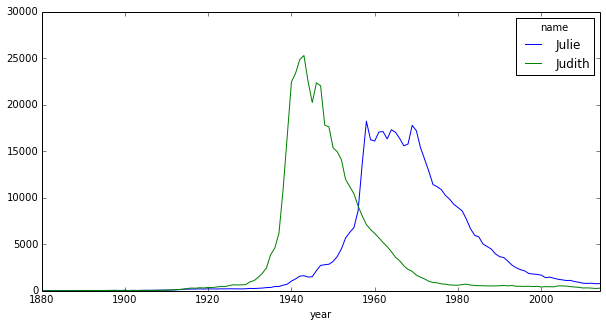

In [6]:
%matplotlib inline
subset = total_births[['Julie', 'Judith']]
subset.plot(figsize=(10, 5), grid = False)
plt.show()

#### Take spelling into account

In [7]:
# Select the names starting with Juli/July and Judi/Judy
all_names = names.name.unique()
julie_like = [i for i in all_names if re.compile(r'Jul[iy]').search(i)]
judit_like = [i for i in all_names if re.compile(r'Jud[iy]').search(i)]

In [8]:
# Select Judith like girl names
filtered_1 = names[(names.name.isin(judit_like)) & (names.sex == 'F')]
alas_1 = filtered_1.groupby('name').births.sum()
alas_1.sort_values(axis=0, inplace=True, ascending=False)
alas_1.head()

name
Judith    451203
Judy      381474
Judi       10233
Judie       5455
Judyth       902
Name: births, dtype: int64

In [9]:
# Select Julie like girl names
filtered_2 = names[(names.name.isin(julie_like)) & (names.sex == 'F')]
alas_2 = filtered_2.groupby('name').births.sum()
alas_2.sort_values(axis=0, inplace=True, ascending=False)
alas_2.head()

name
Julie       505875
Julia       446112
Juliana      50277
Julianna     38896
Julianne     28698
Name: births, dtype: int64

In [10]:
# Create a joined table
table = filtered_1.pivot_table('births',index='year', aggfunc='sum')
table2 = filtered_2.pivot_table('births',index='year', aggfunc='sum')
merged_table = pd.concat([table2, table], axis=1, join='inner')
merged_table.columns=['Julie-like', 'Judith-like']
merged_table.head()


,Julie-like,Judith-like
year,,
1880,815,10
1881,782,15
1882,849,13
1883,914,15
1884,989,24


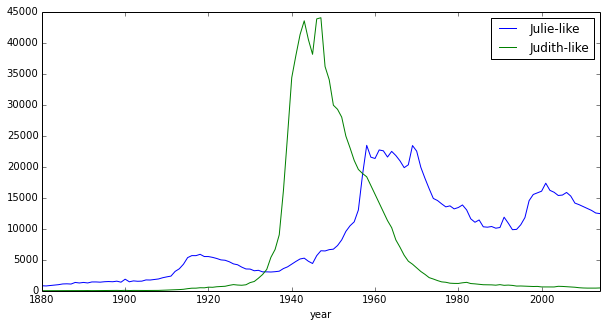

In [11]:
# Plot it
merged_table.plot(figsize=(10, 5), grid = False)
plt.show()

In [12]:
# Sum the interesting range (aka numeric integral)
merged_table.ix[1980:1995].sum(axis=0)[0]/float(merged_table.ix[1980:1995].sum(axis=0)[1])

11.049422375980726

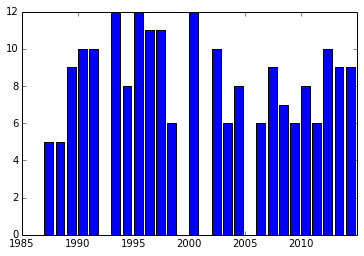

In [14]:
subset = total_births[['Natsumi']]
fig, ax = plt.subplots()
ax.bar(subset.index, subset['Natsumi'])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
plt.show()

In [15]:
natsu_like = [i for i in all_names if re.compile(r'Natsu').search(i)]
natsu_like

['Natsuko', 'Natsue', 'Natsuyo', 'Natsumi', 'Natsuki']

In [16]:
filtered_3 = names[(names.name.isin(natsu_like)) & (names.sex == 'F')]
alas_3 = filtered_3.groupby('name').births.sum()
alas_3.sort_values(axis=0, ascending=False, inplace=True)
alas_3.head()

name
Natsumi    205
Natsuko    155
Natsue      29
Natsuki     28
Natsuyo      5
Name: births, dtype: int64

In [17]:
table = filtered_3.pivot_table('births',index='year', aggfunc='sum')

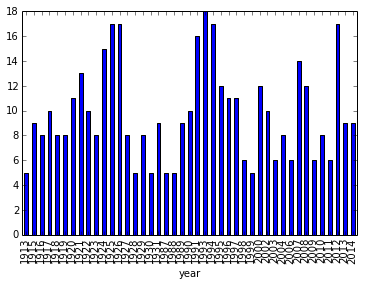

In [18]:
table.plot(kind = 'bar')

In [19]:
filtered_3[['year', 'name', 'births']].groupby(['year', 'name']).sum().unstack()

births                                
name Natsue Natsuki Natsuko Natsumi Natsuyo
year                                       
1913    NaN     NaN       5     NaN     NaN
1915    NaN     NaN       9     NaN     NaN
1916    NaN     NaN       8     NaN     NaN
1917      5     NaN       5     NaN     NaN
1918    NaN     NaN       8     NaN     NaN
1919    NaN     NaN       8     NaN     NaN
1920    NaN     NaN      11     NaN     NaN
1921      6     NaN       7     NaN     NaN
1922    NaN     NaN      10     NaN     NaN
1923    NaN     NaN       8     NaN     NaN
1924      6     NaN       9     NaN     NaN
1925    NaN     NaN      17     NaN     NaN
1926      7     NaN       5     NaN       5
1927    NaN     NaN       8     NaN     NaN
1928    NaN     NaN       5     NaN     NaN
1929    NaN     NaN       8     NaN     NaN
1930      5     NaN     NaN     NaN     NaN
1931    NaN     NaN       9     NaN     NaN
1987    NaN     NaN     NaN       5     NaN
1988    NaN     NaN     NaN       5     NaN
1989    NaN     NaN     NaN       9     NaN
1990    NaN     NaN     NaN      10     NaN
1991    NaN       6     NaN      10     NaN
1993    NaN     NaN       6      12     NaN
1994    NaN     NaN       9       8     NaN
1995    NaN     NaN     NaN      12     NaN
1996    NaN     NaN     NaN      11     NaN
1997    NaN     NaN     NaN      11     NaN
1998    NaN     NaN     NaN       6     NaN
1999    NaN       5     NaN     NaN     NaN
2000    NaN     NaN     NaN      12     NaN
2002    NaN     NaN     NaN      10     NaN
2003    NaN     NaN     NaN       6     NaN
2004    NaN     NaN     NaN       8     NaN
2006    NaN     NaN     NaN       6     NaN
2007    NaN       5     NaN       9     NaN
2008    NaN       5     NaN       7     NaN
2009    NaN     NaN     NaN       6     NaN
2010    NaN     NaN     NaN       8     NaN
2011    NaN     NaN     NaN       6     NaN
2012    NaN       7     NaN      10     NaN
2013    NaN     NaN     NaN       9     NaN
2014    NaN     NaN     NaN       9     NaN